In [ ]:
# -----------------
# Exercise 1
# -----------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# parameters
n = 10   # number of quanta
p = 0.2  # release probability

# possible outcomes: 0 to 10 quanta released
k = np.arange(0, n+1)

# exact binomial probabilities
probs = binom.pmf(k, n, p)

# print probabilities
for i, pr in zip(k, probs):
    print(f"P({i} quanta) = {pr:.4f}")

# plot
plt.bar(k, probs)
plt.xlabel('Number of quanta released')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.show()

In [ ]:
# -----------------
# Exercise 2
# -----------------

# parameters
n = 14   # number of quanta
p = np.arange(0.1, 1.1, 0.1) # release probability 0.1 to 1
k = 8 # known quantal release

# exact binomial probabilities
probs = binom.pmf(k, n, p)

# print probabilities
for pi, pr in zip(p, probs):
    print(f"P(k={k} | p={pi:.1f}) = {pr:.6f}")

# plot
plt.bar(p, probs, width=0.05)
plt.xlabel('Release probability p')
plt.ylabel(f'P({k} quanta)')
plt.title(f'Binomial probabilities (n={n}, k={k})')
plt.show()

the probability you would get 8 quanta given the release rate was 0.1 is 0.000016
P(k=8 | p=0.7) = 0.126202
the most probable release rate is 0.6 

In [ ]:
# -----------------
# Exercise 3
# -----------------

# parameters
n = 14   # number of quanta
p = np.arange(0.1, 1.1, 0.1) # release probability 0.1 to 1
k2 = 5 # known quantal release

# exact binomial probabilities
probs2 = binom.pmf(k2, n, p)

# print probabilities
for pi, pr in zip(p, probs2):
    print(f"P(k={k2} | p={pi:.1f}) = {pr:.6f}")

comb_probs = probs * probs2
log_comb_probs = np.log(probs) + np.log(probs2) 

# print probabilities
print(f"combined likelihoods")
for pi, pr in zip(p, comb_probs):
    print(f"P(k={k2} | p={pi:.1f}) = {pr:.6f}")

print(f"combined log-likelihoods")
for pi, pr in zip(p, log_comb_probs):
    print(f"P(k={k2} | p={pi:.1f}) = {pr:.6f}")

combined likelihoods:
P(k=5 | p=0.1) = 0.000000

combined log-likelihoods:
P(k=5 | p=0.1) = -15.904745

maximum value is at p=0.5

increasing sample size would reduce the number of maximum likelihood estimates which in turn would sharpen the curve towards a specific probability value 

Exercise 4

p̂​  = x/n
x = number of successes 
n = total number of observations 

p̂ = (0*0 + 1*0 + 2*3 + ... + 14*0)/(107*14) = 653/1498 = 0.44

Exercise 5

to calculate the p value we need to know what is the probably that we would have a quantal release of 7 or higher given that p=0.3 (null hypothesis) 
To do this we use the binomial distribution: P(X=k)=(n k​)p^k(1−p)^n−k
This gives us a value of 0.093 which is higher than the standard significance level of p < 0.05 so we cannot say that the null hypothesis isn't true so we cannot say that the temperature necessarily had an effect 

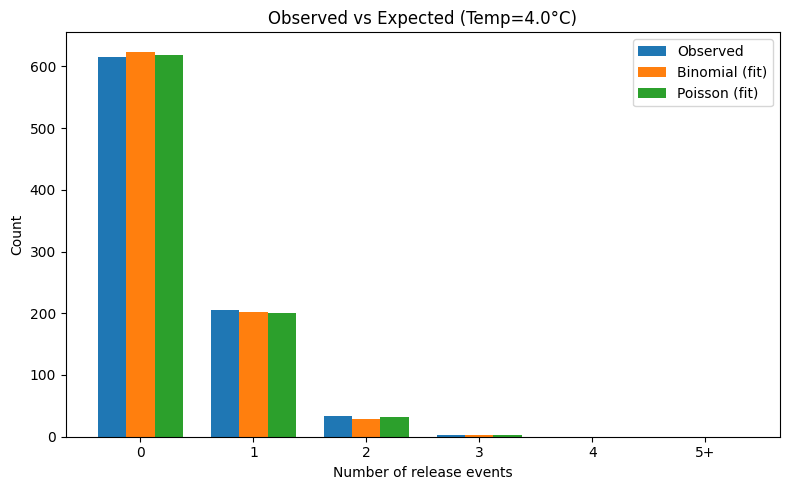

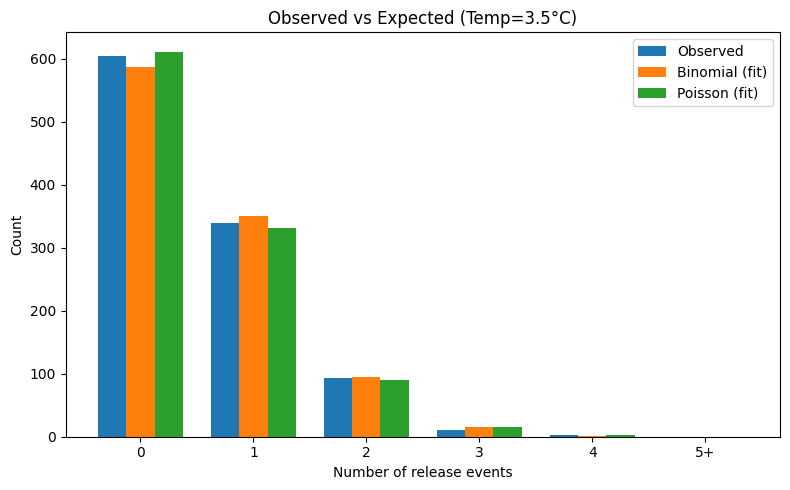

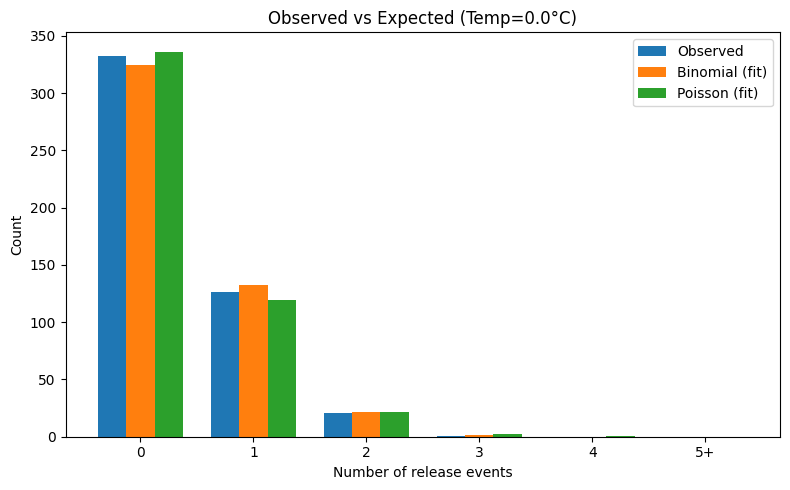

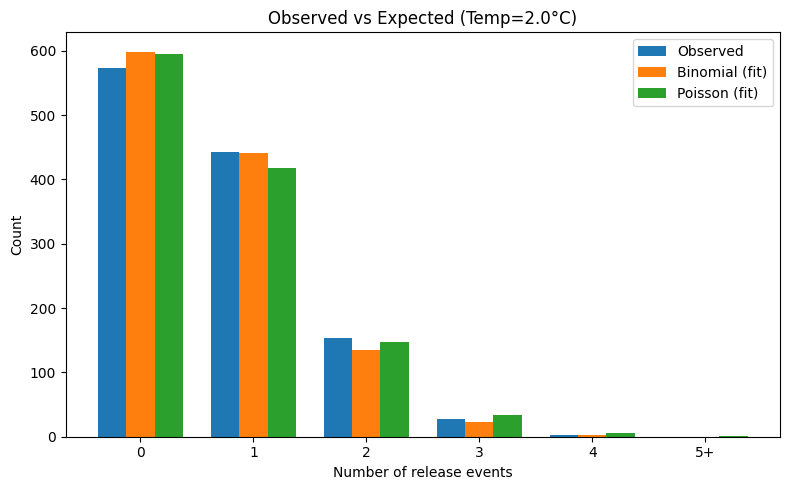

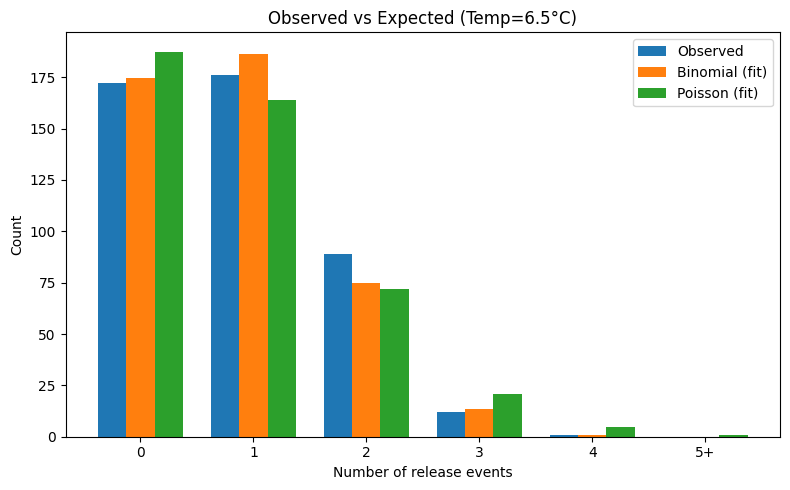

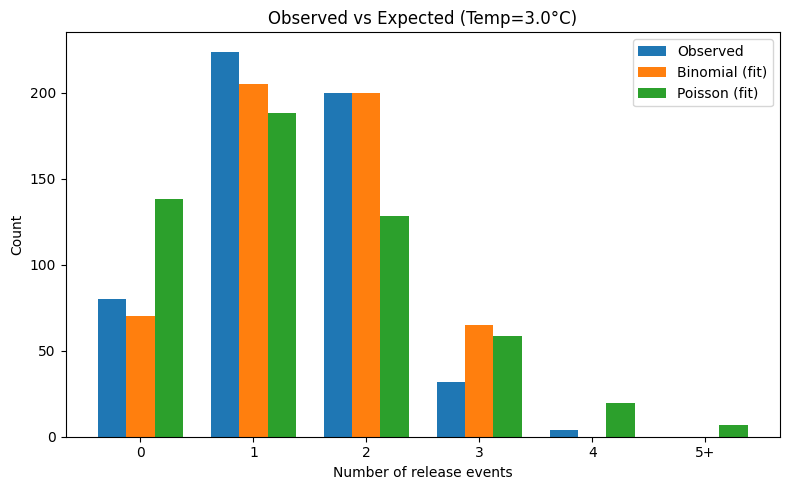

In [ ]:
# -----------------
# BONUS
# -----------------

import numpy as np
import pandas as pd
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt

# === Data from table ===
data = [
    [4.0, 615, 206, 33, 2, 0, 0],
    [3.5, 604, 339, 94, 11, 2, 0],
    [0.0, 332, 126, 21, 1, 0, 0],
    [2.0, 573, 443, 154, 28, 2, 0],
    [6.5, 172, 176, 89, 12, 1, 0],
    [3.0,  80, 224, 200, 32, 4, 0],
]
cols = ["Temp", "n0", "n1", "n2", "n3", "n4", "n5+"]
df = pd.DataFrame(data, columns=cols)

# Function to compute parameters and expected distributions
def analyze_row(row):
    counts = np.array([row["n0"], row["n1"], row["n2"], row["n3"], row["n4"], row["n5+"]])
    k_vals = np.array([0,1,2,3,4,5])  # treat 5+ bin as 5
    N = counts.sum()
    
    # mean and variance
    mean = (k_vals * counts).sum() / N
    mean_sq = ((k_vals**2) * counts).sum() / N
    var = mean_sq - mean**2
    
    # estimates
    p_hat = 1 - var/mean if mean > 0 else np.nan
    n_hat = mean/p_hat if p_hat > 0 else np.nan
    
    # expected binomial distribution
    if np.isnan(n_hat) or n_hat <= 0:
        expected_binom = np.zeros_like(counts, dtype=float)
    else:
        n_int = int(round(n_hat))
        probs_binom = [binom.pmf(k, n_int, p_hat) for k in range(5)]
        probs_binom.append(1 - sum(probs_binom))  # lump k>=5
        expected_binom = N * np.array(probs_binom)
    
    # expected Poisson distribution
    probs_pois = [poisson.pmf(k, mean) for k in range(5)]
    probs_pois.append(1 - sum(probs_pois))  # lump k>=5
    expected_pois = N * np.array(probs_pois)
    
    return pd.Series({
        "N": N,
        "mean": mean,
        "var": var,
        "p_hat": p_hat,
        "n_hat": n_hat,
        "obs_counts": counts,
        "exp_binom": expected_binom,
        "exp_pois": expected_pois
    })

# Apply analysis
results = df.apply(analyze_row, axis=1)

# === Plotting ===
k_labels = ["0","1","2","3","4","5+"]

for i, row in df.iterrows():
    temp = row["Temp"]
    obs = results.loc[i, "obs_counts"]
    binom_exp = results.loc[i, "exp_binom"]
    pois_exp = results.loc[i, "exp_pois"]
    
    x = np.arange(len(k_labels))
    width = 0.25
    
    plt.figure(figsize=(8,5))
    plt.bar(x - width, obs, width, label="Observed")
    plt.bar(x, binom_exp, width, label="Binomial (fit)")
    plt.bar(x + width, pois_exp, width, label="Poisson (fit)")
    
    plt.xticks(x, k_labels)
    plt.xlabel("Number of release events")
    plt.ylabel("Count")
    plt.title(f"Observed vs Expected (Temp={temp}°C)")
    plt.legend()
    plt.tight_layout()
    plt.show()
